In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from binance.client import Client
from binance.exceptions import BinanceAPIException
from secrets import secrets

BINANCE_API_KEY = secrets['BINANCE_API_KEY']
BINANCE_SECRET_KEY = secrets['BINANCE_SECRET_KEY']
BRIDGE = 'USDT'
COINS = ['BTC', 'ETH', 'LTC', 'XRP', 'BNB', 'ADA', 'BAT', 'FTM']

client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY)

In [3]:
symbol = 'BTC' + BRIDGE
btc_kline = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_15MINUTE)

In [4]:
cols = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteVolume', 'NumberTrades',
        'TakerBuyBaseVolume', 'TakerBuyQuoteVolume', 'Ignore']
num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume', 'TakerBuyBaseVolume', 'TakerBuyQuoteVolume']
df = pd.DataFrame(btc_kline, columns=cols)
df = df.drop(columns=['CloseTime', 'Ignore'])
df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df['NumberTrades'] = df['NumberTrades'].astype('int')
df.tail()

,OpenTime,Open,High,Low,Close,Volume,QuoteVolume,NumberTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
495,2021-04-11 08:30:00,60050.84,60059.94,59840.83,59993.61,370.198431,2.219814e+07,13462,172.501344,1.034391e+07
496,2021-04-11 08:45:00,59993.61,60070.00,59937.34,59961.81,278.736107,1.672679e+07,12957,153.315955,9.200308e+06
497,2021-04-11 09:00:00,59961.81,60045.00,59713.13,59796.52,322.787356,1.933096e+07,23041,152.136796,9.112015e+06
498,2021-04-11 09:15:00,59796.52,59836.51,59572.20,59755.36,463.874290,2.769439e+07,25531,246.147969,1.469692e+07
499,2021-04-11 09:30:00,59755.36,59800.01,59455.09,59477.81,412.137074,2.458005e+07,12515,145.516814,8.674455e+06


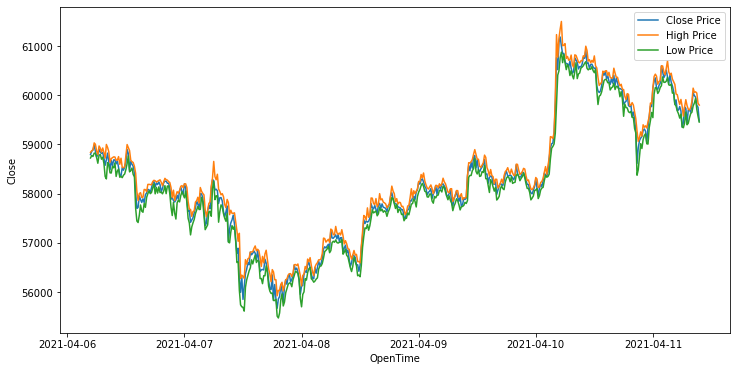

In [69]:
plt.figure(figsize=(12,6))
# ax = sns.lineplot(data=df, x='OpenTime', y='Open', label='Open Price')
ax = sns.lineplot(data=df, x='OpenTime', y='Close', label='Close Price')
ax = sns.lineplot(data=df, x='OpenTime', y='High', label='High Price')
ax = sns.lineplot(data=df, x='OpenTime', y='Low', label='Low Price');

In [70]:
df.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteVolume,NumberTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume
0,2021-04-06 04:45:00,58755.03,58840.00,58725.00,58794.93,318.233462,1.870691e+07,14979,179.601670,1.055719e+07
1,2021-04-06 05:00:00,58794.94,58873.17,58775.97,58862.00,294.361074,1.731510e+07,13287,140.106079,8.241430e+06
2,2021-04-06 05:15:00,58862.00,58887.22,58755.56,58887.22,347.193581,2.041902e+07,11971,164.953156,9.700466e+06
3,2021-04-06 05:30:00,58887.47,59031.66,58823.35,58984.13,339.765181,2.002893e+07,14341,170.239843,1.003505e+07
4,2021-04-06 05:45:00,58980.61,59003.16,58822.84,58867.32,377.873431,2.226012e+07,14889,163.141047,9.609643e+06


In [71]:
df2 = df.copy()
# df2 = df.copy()[['OpenTime', 'Open', 'High', 'Low', 'Volume', 'QuoteVolume', 'NumberTrades']]
df2['15minChange'] = (df2['Open'] - df2['Open'].shift(1)) * 100 / df2['Open'].shift(1)
df2['30minChange'] = (df2['Open'] - df2['Open'].shift(2)) * 100 / df2['Open'].shift(2)
df2['45minChange'] = (df2['Open'] - df2['Open'].shift(3)) * 100 / df2['Open'].shift(3)
df2['1hrChange'] = (df2['Open'] - df2['Open'].shift(4)) * 100 / df2['Open'].shift(4)
df2.head()

,OpenTime,Open,High,Low,Close,Volume,QuoteVolume,NumberTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,15minChange,30minChange,45minChange,1hrChange
0,2021-04-06 04:45:00,58755.03,58840.00,58725.00,58794.93,318.233462,1.870691e+07,14979,179.601670,1.055719e+07,NaN,NaN,NaN,NaN
1,2021-04-06 05:00:00,58794.94,58873.17,58775.97,58862.00,294.361074,1.731510e+07,13287,140.106079,8.241430e+06,0.067926,NaN,NaN,NaN
2,2021-04-06 05:15:00,58862.00,58887.22,58755.56,58887.22,347.193581,2.041902e+07,11971,164.953156,9.700466e+06,0.114057,0.182061,NaN,NaN
3,2021-04-06 05:30:00,58887.47,59031.66,58823.35,58984.13,339.765181,2.002893e+07,14341,170.239843,1.003505e+07,0.043271,0.157377,0.225410,NaN
4,2021-04-06 05:45:00,58980.61,59003.16,58822.84,58867.32,377.873431,2.226012e+07,14889,163.141047,9.609643e+06,0.158166,0.201505,0.315792,0.383933


In [59]:
df2.describe()

,Open,High,Low,Close,Volume,QuoteVolume,NumberTrades,TakerBuyBaseVolume,TakerBuyQuoteVolume,15minChange,30minChange,45minChange,1hrChange,NextClose
count,500.000000,500.00000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,5.000000e+02,499.000000,498.000000,497.000000,496.000000,499.000000
mean,58258.793860,58381.62464,58125.397040,58260.282820,577.258330,3.365516e+07,20506.348000,287.998176,1.680083e+07,0.003775,0.007553,0.011659,0.015872,58259.211383
std,1279.885656,1277.84616,1284.627893,1280.847311,417.321886,2.464729e+07,10625.654335,225.655443,1.340341e+07,0.280072,0.393245,0.478082,0.562993,1281.908347
min,55670.290000,55924.00000,55473.000000,55670.290000,167.954098,9.810279e+06,9075.000000,75.852495,4.430743e+06,-1.248385,-1.576869,-1.741441,-1.927009,55670.290000
25%,57592.235000,57684.24000,57418.255000,57592.235000,357.910760,2.074183e+07,14559.750000,170.316813,1.002426e+07,-0.146138,-0.220117,-0.267954,-0.282569,57582.890000
50%,58116.045000,58200.00000,58000.005000,58116.045000,466.373953,2.739335e+07,18348.000000,226.587243,1.328585e+07,0.009297,-0.004836,-0.010195,-0.021849,58113.570000
75%,58872.350000,59000.79000,58757.920000,58890.412500,637.214090,3.801294e+07,23485.000000,315.472183,1.839854e+07,0.155155,0.226811,0.272401,0.323697,58893.605000
max,61183.790000,61500.00000,60876.370000,61183.790000,5215.582513,3.158883e+08,149497.000000,3209.617369,1.943766e+08,1.605507,2.587039,2.935385,3.114310,61183.790000


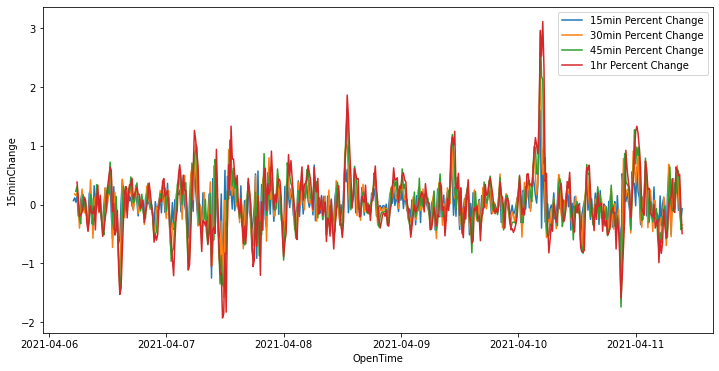

In [60]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df2, x='OpenTime', y='15minChange', label='15min Percent Change')
ax = sns.lineplot(data=df2, x='OpenTime', y='30minChange', label='30min Percent Change')
ax = sns.lineplot(data=df2, x='OpenTime', y='45minChange', label='45min Percent Change')
ax = sns.lineplot(data=df2, x='OpenTime', y='1hrChange', label='1hr Percent Change');

## LSTM

In [25]:
df3 = df.copy()
X = df3.drop(columns=['OpenTime', 'Close'])
y = df3['Close']
train_size = 400
valid_size = 75

X_train, y_train = X[:train_size], y[:train_size]
X_valid, y_valid = X[train_size:train_size+valid_size], y[train_size:train_size+valid_size]
X_test, y_test = X[train_size+valid_size:], y[train_size+valid_size:]
y_train.shape, y_valid.shape, y_test.shape

((400,), (75,), (25,))

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_valid = scaler.transform(X_valid)
Xs_test = scaler.transform(X_test)
# Reshape input to be 3D [samples, timesteps, features]
Xs_train = Xs_train.reshape((Xs_train.shape[0], 1, Xs_train.shape[1]))
Xs_valid = Xs_valid.reshape((Xs_valid.shape[0], 1, Xs_valid.shape[1]))
Xs_test = Xs_test.reshape((Xs_test.shape[0], 1, Xs_test.shape[1]))
Xs_train.shape, Xs_valid.shape, Xs_test.shape

((400, 1, 8), (75, 1, 8), (25, 1, 8))

Epoch 1/20
6/6 - 2s - loss: 57820.6406 - val_loss: 60089.7656
Epoch 2/20
6/6 - 0s - loss: 57820.5938 - val_loss: 60089.6992
Epoch 3/20
6/6 - 0s - loss: 57820.5547 - val_loss: 60089.6328
Epoch 4/20
6/6 - 0s - loss: 57820.5117 - val_loss: 60089.5664
Epoch 5/20
6/6 - 0s - loss: 57820.4609 - val_loss: 60089.4922
Epoch 6/20
6/6 - 0s - loss: 57820.4102 - val_loss: 60089.4219
Epoch 7/20
6/6 - 0s - loss: 57820.3555 - val_loss: 60089.3320
Epoch 8/20
6/6 - 0s - loss: 57820.2891 - val_loss: 60089.2461
Epoch 9/20
6/6 - 0s - loss: 57820.2305 - val_loss: 60089.1328
Epoch 10/20
6/6 - 0s - loss: 57820.1602 - val_loss: 60089.0273
Epoch 11/20
6/6 - 0s - loss: 57820.0781 - val_loss: 60088.9141
Epoch 12/20
6/6 - 0s - loss: 57820.0000 - val_loss: 60088.7734
Epoch 13/20
6/6 - 0s - loss: 57819.9102 - val_loss: 60088.6211
Epoch 14/20
6/6 - 0s - loss: 57819.8008 - val_loss: 60088.4609
Epoch 15/20
6/6 - 0s - loss: 57819.6836 - val_loss: 60088.2852
Epoch 16/20
6/6 - 0s - loss: 57819.5664 - val_loss: 60088.0938
E

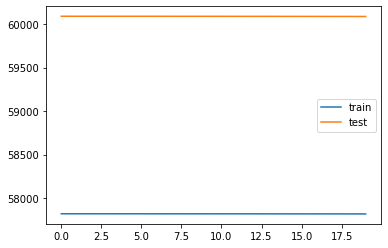

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, input_shape=(Xs_train.shape[1], Xs_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(Xs_train, y_train, epochs=20, batch_size=72, validation_data=(Xs_valid, y_valid), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [38]:
model.predict(Xs_test)

array([[2.5285552],
       [2.5932062],
       [2.631608 ],
       [2.515567 ],
       [2.54587  ],
       [2.4400725],
       [2.597834 ],
       [2.7147954],
       [2.6465917],
       [2.4880226],
       [2.4893687],
       [2.3037202],
       [2.4498107],
       [2.5032604],
       [2.331984 ],
       [2.2618468],
       [2.2587495],
       [2.3133333],
       [2.382345 ],
       [2.501603 ],
       [2.4710977],
       [2.4394479],
       [2.4722223],
       [2.5033002],
       [2.3403842]], dtype=float32)

## Regression

In [81]:
df4 = df2.dropna()
X = df4.drop(columns=['OpenTime', 'Close'])
y = df4['Close']

n_train_period = int(0.8 * len(X))
X_train, y_train = X[:n_train_period], y[:n_train_period]
X_test, y_test = X[n_train_period:], y[n_train_period:]

y_train.shape, y_test.shape

((396,), (100,))

In [82]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9947637434307915

In [83]:
# Test score
model.score(X_test, y_test)

0.9670368538929279

In [84]:
# Predictions
df_test = df4[['OpenTime', 'Open', 'Close']]
df_test = df_test.iloc[n_train_period:]
df_test['Predict'] = model.predict(X_test)
df_test['ActualChange'] = (df_test['Close'] - df_test['Open']) / df_test['Open']
df_test['PredictChange'] = (df_test['Predict'] - df_test['Open']) / df_test['Open']
df_test.head()

,OpenTime,Open,Close,Predict,ActualChange,PredictChange
400,2021-04-10 08:45:00,60668.61,60534.89,60515.851622,-0.002204,-0.002518
401,2021-04-10 09:00:00,60534.89,60582.84,60551.553352,0.000792,0.000275
402,2021-04-10 09:15:00,60582.83,60576.09,60630.093846,-0.000111,0.000780
403,2021-04-10 09:30:00,60576.09,60631.42,60653.919254,0.000913,0.001285
404,2021-04-10 09:45:00,60631.41,60772.73,60713.182926,0.002331,0.001349


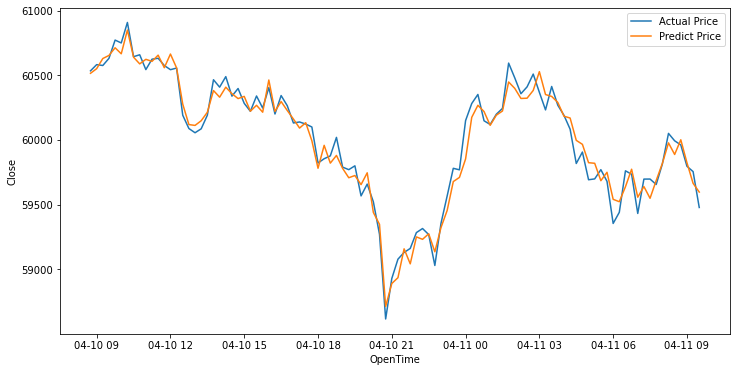

In [86]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_test, x='OpenTime', y='Close', label='Actual Price')
ax = sns.lineplot(data=df_test, x='OpenTime', y='Predict', label='Predict Price');

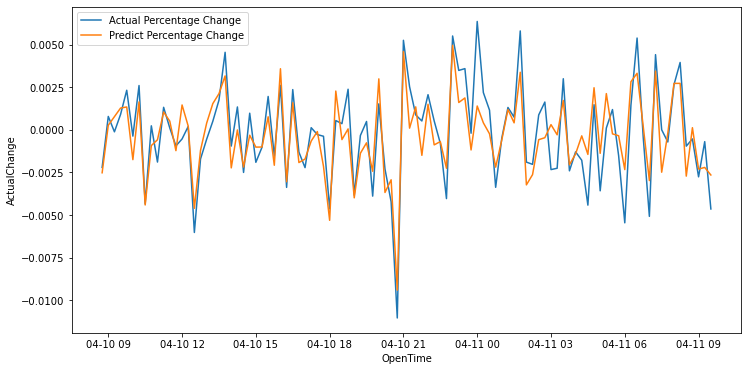

In [87]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_test, x='OpenTime', y='ActualChange', label='Actual Percentage Change')
ax = sns.lineplot(data=df_test, x='OpenTime', y='PredictChange', label='Predict Percentage Change');

## Simulation

In [128]:
def simulate_regression(coin, n_test_period=100):
    # Get kline data from Binance
    client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY)
    symbol = coin + BRIDGE
    kline = client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_15MINUTE)
    # Convert kline to df
    cols = ['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QuoteVolume', 'NumberTrades',
            'TakerBuyBaseVolume', 'TakerBuyQuoteVolume', 'Ignore']
    num_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'QuoteVolume', 'TakerBuyBaseVolume', 'TakerBuyQuoteVolume']
    df = pd.DataFrame(kline, columns=cols)
    df = df.drop(columns=['CloseTime', 'Ignore'])
    df['OpenTime'] = pd.to_datetime(df['OpenTime'], unit='ms')
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
    df['NumberTrades'] = df['NumberTrades'].astype('int')
    # Get shift changes
    df['15minChange'] = (df['Open'] - df['Open'].shift(1)) * 100 / df['Open'].shift(1)
    df['30minChange'] = (df['Open'] - df['Open'].shift(2)) * 100 / df['Open'].shift(2)
    df['45minChange'] = (df['Open'] - df['Open'].shift(3)) * 100 / df['Open'].shift(3)
    df['1hrChange'] = (df['Open'] - df['Open'].shift(4)) * 100 / df['Open'].shift(4)
    # Convert to train/test
    df = df.dropna()
    X = df.drop(columns=['OpenTime', 'Close'])
    y = df['Close']
    n_train_period = len(X) - n_test_period
    X_train, y_train = X[:n_train_period], y[:n_train_period]
    X_test, y_test = X[n_train_period:], y[n_train_period:]
    # Fit to regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Predict
    df_test = df[['OpenTime', 'Open', 'Close']]
    df_test = df_test.iloc[n_train_period:]
    df_test['Predict'] = model.predict(X_test)
    df_test['ActualChange'] = (df_test['Close'] - df_test['Open']) / df_test['Open']
    df_test['PredictChange'] = (df_test['Predict'] - df_test['Open']) / df_test['Open']
    # Portfolio info
    initial = 5000
    trans_fee = 0.0075
    portfolio = {'value': initial, 'usd': initial, coin: 0, 'buy_price': 1}
    # Simulate
    for _, row in df_test.iterrows():
        # Have BTC, sell for profit
        if (row['Open'] - portfolio['buy_price']) / portfolio['buy_price'] > 0.02 and portfolio[coin] > 0:
            portfolio = sell_coin(portfolio, coin, row['Open'])
        # BTC price increase
        if row['PredictChange'] > 0:
            # No BTC
            if portfolio['usd'] > 0:
                portfolio = buy_coin(portfolio, coin, row['Open'])
        # BTC price decrease
        else:
            # Have BTC
            if row['Open'] > (portfolio['buy_price'] * (1 + trans_fee)) and portfolio[coin] > 0:
                portfolio = sell_coin(portfolio, coin, row['Open'])
    return portfolio

def buy_coin(portfolio, coin, price):
    portfolio[coin] = (portfolio['usd'] / price) * (1 - trans_fee)
    portfolio['usd'] = 0
    portfolio['buy_price'] = price
    portfolio['value'] = portfolio[coin] * price
    print('Buy for {}'.format(price))
    return portfolio

def sell_coin(portfolio, coin, price):
    portfolio['usd'] = portfolio[coin] * price * (1 - trans_fee)
    portfolio[coin] = 0
    portfolio['value'] = portfolio['usd']
    print('Sell for {}'.format(price))
    return portfolio

In [129]:
simulate_regression('OGN', n_test_period=200)

Buy for 3.0831
Sell for 3.1914
Buy for 3.1598
Sell for 3.1858
Buy for 3.1744
Sell for 3.232
Buy for 3.1212
Sell for 3.1615
Buy for 3.1177


{'value': 5028.963405923767,
 'usd': 0,
 'OGN': 1613.0363427923683,
 'buy_price': 3.1177}